In [61]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from dynamic_bernoulli_embeddings.analysis import DynamicEmbeddingAnalysis

In [84]:
token_to_id = pickle.load(open("./save2/hj_word2id.pkl", "rb"))
embeddings = pickle.load(open("./save2/emb_mat.pkl", 'rb'))
emb = DynamicEmbeddingAnalysis(embeddings, token_to_id)
loss_curves = pd.read_csv("./save/loss_history.csv")

In [81]:
loss_curves.l_pos * -1

0       300247.75000
1       301102.68750
2       295999.28125
3       298982.62500
4       295482.62500
            ...     
1495    200498.53125
1496    203249.84375
1497    200869.90625
1498    197671.62500
1499    195265.78125
Name: l_pos, Length: 1500, dtype: float64

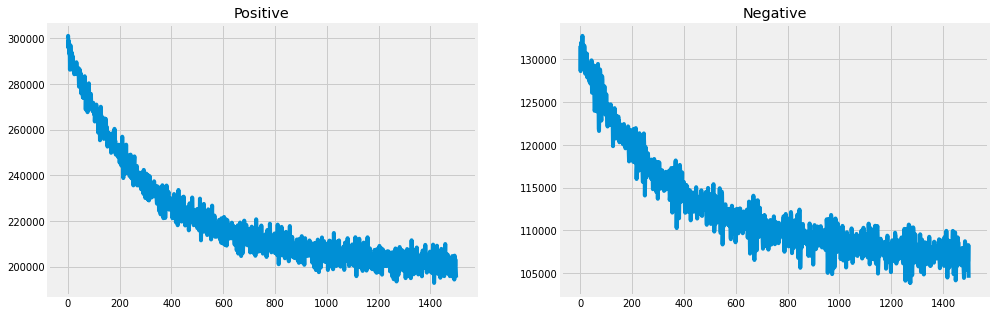

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
(loss_curves.l_pos * -1).plot(title="Positive", ax=ax[0])
(loss_curves.l_neg * -1).plot(title="Negative", ax=ax[1])

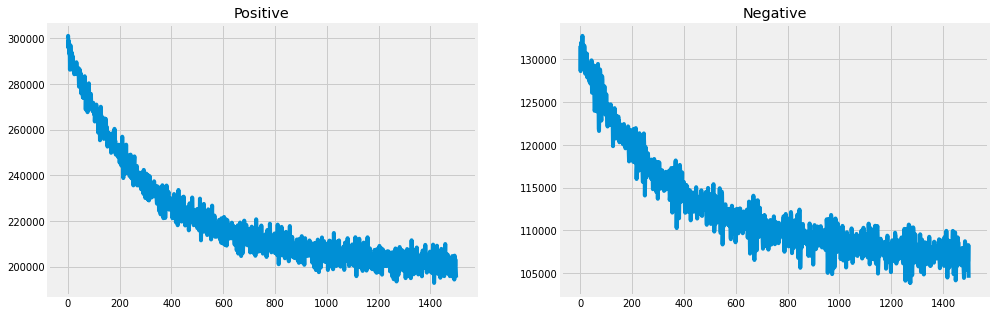

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
(loss_curves.l_pos * -1).plot(title="Positive", ax=ax[0]).figure.savefig('psudo_log_likelihood_positive.png', dpi=300)
(loss_curves.l_neg * -1).plot(title="Negative", ax=ax[1]).figure.savefig('psudo_log_likelihood_negative.png', dpi=300)

In [76]:
loss_curves.l_pos.plot(title="Positive", ax=ax[0])
loss_curves.l_pos.plot(title="Negative", ax=ax[1])

In [50]:
embeddings[0][token_to_id['罒']][:2]

array([-0.0656049 , -0.12597857], dtype=float32)

In [51]:
embeddings[0][token_to_id['儵']][:2]

array([-0.0203871 , -0.09746558], dtype=float32)

In [52]:
embeddings[0][token_to_id['猬']][:2]

array([-0.08938599, -0.14601016], dtype=float32)

In [46]:
((embeddings[0][108] - embeddings[0][109])**2).sum()

3.1628325

In [47]:
((embeddings[0][108] - embeddings[0][110])**2).sum()

3.4197981

In [38]:
embeddings[0][token_to_id['閔']]

array([-0.07874962,  0.04253597, -0.08297154, -0.12170552, -0.15759322,
       -0.04843771, -0.20479082, -0.05188482,  0.12736182, -0.2091365 ,
        0.02947977, -0.12769985,  0.05170855,  0.11479785,  0.13223723,
       -0.11160894,  0.1977106 , -0.04151506, -0.08489423, -0.12353891,
       -0.01972689,  0.01664209,  0.17008086,  0.04832738,  0.01746116,
       -0.06922659, -0.02204695, -0.16443987, -0.07890434, -0.01893159,
       -0.03503179, -0.06335739,  0.17391643,  0.09830656, -0.00449946,
        0.01284605, -0.11980172,  0.031652  ,  0.01996348,  0.05630143,
        0.06185686,  0.18202792, -0.06606692,  0.12883122,  0.14082012,
       -0.12827912,  0.01843413,  0.02009592,  0.05220659, -0.11301747,
       -0.08333789,  0.35800037,  0.11299983, -0.01413253,  0.09667203,
       -0.13180192, -0.06363732,  0.07799105,  0.04758923,  0.08297397,
       -0.15785924,  0.0573437 , -0.00370607,  0.18166307, -0.07005221,
        0.00515653,  0.00588921,  0.0364566 , -0.19307718,  0.00

In [35]:
pd.DataFrame(emb.absolute_drift(20), columns=["Drift", "Term"])[["Term", "Drift"]]

,Term,Drift
0,閔,1.504979
1,趙,1.436970
2,召,1.409452
3,允,1.372887
4,對,1.351915
5,沈,1.320718
6,院,1.320238
7,李,1.318547
8,諫,1.280013
9,奏,1.251034


In [8]:
pd.DataFrame(emb.absolute_drift(20), columns=["Drift", "Term"])[["Term", "Drift"]]

,Term,Drift
0,閔,1.504979
1,趙,1.436970
2,召,1.409452
3,允,1.372887
4,對,1.351915
5,沈,1.320718
6,院,1.320238
7,李,1.318547
8,諫,1.280013
9,奏,1.251034


In [30]:
pd.DataFrame([(i+1, term, change) for i, term, change in emb.change_points(10)], columns=["Year", "Term", "Change"])

,Year,Term,Change
0,16,傳,0.422742
1,19,身,0.403383
2,10,曰,0.388264
3,11,佐,0.378479
4,6,等,0.378112
5,14,宗,0.376941
6,11,金,0.372798
7,7,等,0.372668
8,14,勿,0.370419
9,7,四,0.368270


In [85]:
v = '倭' # 왜 = '倭'
# v = '震'
over_time = {}
for i in range(0, 27):
    col = str(i+1)
    over_time[col] = emb.neighborhood(v, i, 10, sign=False)
over_time = pd.DataFrame(over_time)

In [86]:
over_time.transpose()

,0,1,2,3,4,5,6,7,8,9
1,艘,舶,寇,虜,𤧫,隻,罒,錪,浦,賊
2,艘,舶,虜,寇,賊,隻,野,𤧫,浦,罒
3,舶,虜,艘,寇,隻,賊,𤧫,浦,罒,野
4,舶,虜,艘,隻,𤧫,鮑,寇,賊,椵,啇
5,舶,艘,隻,虜,𤧫,錪,椵,鮑,僱,罒
6,舶,隻,艘,𤧫,虜,錪,鷮,僱,椵,嵰
7,舶,隻,艘,鷮,錪,僱,𤧫,罒,媦,嗎
8,舶,隻,艘,僱,𤧫,嗎,錪,鷮,野,椵
9,舶,隻,艘,啇,泊,鮑,野,僱,嗎,椵
10,隻,艘,舶,虜,泊,船,嗎,搶,寇,椵
